In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv('analytic_data2019.csv', low_memory=False)
xcl = pd.ExcelFile('2019_County_Health_Rankings_Data_v2.xls')

In [3]:
outcomes_fact_r = pd.read_excel(xcl, sheet_name='Outcomes & Factors Rankings')

In [4]:
outcomes_fact_r.columns = list(outcomes_fact_r.iloc[0])
outcomes_fact_r.drop([0],inplace=True)

In [5]:
outcomes_fact_r.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,7,1,11,1
2,01003,Alabama,Baldwin,67,2,1,3,1
3,01005,Alabama,Barbour,67,33,2,58,4
4,01007,Alabama,Bibb,67,40,3,29,2
5,01009,Alabama,Blount,67,22,2,16,1


In [6]:
outcomes_fact_subr = pd.read_excel(xcl, sheet_name='Outcomes & Factors SubRankings')
outcomes_fact_subr.columns = list(outcomes_fact_subr.iloc[0])
outcomes_fact_subr.drop([0],inplace=True)

In [7]:
outcomes_fact_subr.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile,Rank,Quartile
1,01001,Alabama,Autauga,67,8,1,5,1,15,1,14,1,5,1,50,3
2,01003,Alabama,Baldwin,67,3,1,4,1,3,1,4,1,3,1,62,4
3,01005,Alabama,Barbour,67,14,1,48,3,53,4,30,2,61,4,32,2
4,01007,Alabama,Bibb,67,47,3,24,2,38,3,16,1,38,3,31,2
5,01009,Alabama,Blount,67,36,3,14,1,10,1,41,3,15,1,53,4


In [8]:
ranked_measure = pd.read_excel(xcl, sheet_name='Ranked Measure Data')
ranked_measure.columns = list(ranked_measure.iloc[0])
ranked_measure.drop([0],inplace=True)

In [9]:
ranked_measure.head()

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,95% CI - High,Quartile,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low,95% CI - High,Quartile
1,01001,Alabama,Autauga,8824.06,7935.33,9712.79,1,10471.3,NaN,8706.66,...,88.9008,3,82.722,NaN,83.71,20911,38.3,34.3627,42.2373,3
2,01003,Alabama,Baldwin,7224.63,6794.13,7655.14,1,10042.5,3086.61,7277.78,...,86.5707,2,84.9219,68.3439,83.7991,74415,40.5,38.1835,42.8165,3
3,01005,Alabama,Barbour,9586.17,8200.12,10972.2,1,11332.6,NaN,7309.64,...,85.7693,1,80.1547,NaN,86.2453,7242,33.8,28.8672,38.7328,2
4,01007,Alabama,Bibb,11783.5,10160,13407.1,3,14812.5,NaN,11327.6,...,90.6773,3,NaN,NaN,NaN,6930,48.6,40.3108,56.8892,4
5,01009,Alabama,Blount,10908.1,9895.58,11920.6,3,NaN,5619.65,11336,...,88.8468,3,NaN,81.7672,83.4145,18426,59.7,55.4807,63.9193,4


In [10]:
add_measure = pd.read_excel(xcl, sheet_name='Additional Measure Data')
add_measure.columns = list(add_measure.iloc[0])
add_measure.drop([0],inplace=True)

In [11]:
add_measure.head()

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural,% Rural
1,01001,Alabama,Autauga,76.3306,75.5541,77.1071,74.6006,NaN,76.3372,815,...,2.85745,41336,74.4739,430,0.828548,0.422472,1.23462,51.3422,22921,42.0022
2,01003,Alabama,Baldwin,78.5995,78.2084,78.9906,75.6289,98.0399,78.537,2827,...,4.5502,176582,83.0474,872,0.454512,0.282144,0.62688,51.4528,77060,42.2791
3,01005,Alabama,Barbour,75.7795,74.6394,76.9196,74.2402,NaN,77.5684,451,...,4.20657,11613,45.9557,297,1.19927,0.580536,1.81801,47.2299,18613,67.7896
4,01007,Alabama,Bibb,73.9283,72.6246,75.2319,72.2947,NaN,74.1095,445,...,2.63808,16842,74.2986,84,0.394348,0,0.933361,46.4531,15663,68.3526
5,01009,Alabama,Blount,74.5978,73.811,75.3845,NaN,78.5771,74.0982,1050,...,9.5651,50439,86.9443,1013,1.87,1.36418,2.37583,50.6886,51562,89.9515


In [12]:
add_measure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3142
Columns: 111 entries, FIPS to % Rural
dtypes: object(111)
memory usage: 2.7+ MB


In [13]:
df1.drop([0],inplace=True)
df1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Columns: 534 entries, State FIPS Code to Population growth raw value
dtypes: object(534)
memory usage: 13.0+ MB


In [15]:
life_exp = add_measure[['FIPS','State','County','Life Expectancy', '% Frequent Physical Distress',
                       '% Frequent Mental Distress', '% Diabetic', '% Food Insecure',
                        '% Insufficient Sleep', 'Household Income', '% Homeowners',
                       '% Severe Housing Cost Burden', 'Population']]
life_exp.head()

,FIPS,State,County,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden,Population
1,01001,Alabama,Autauga,76.3306,12.8244,12.6384,14.2,13.4,35.9054,58343,73.2877,12.6452,55504
2,01003,Alabama,Baldwin,78.5995,12.622,12.8226,11.3,12.3,33.3059,56607,72.8593,12.7959,212628
3,01005,Alabama,Barbour,75.7795,16.2162,14.6323,18,23.2,38.5632,32490,62.5068,13.5868,25270
4,01007,Alabama,Bibb,73.9283,13.163,12.854,14.9,15.8,38.1489,45795,75.3615,8.73389,22668
5,01009,Alabama,Blount,74.5978,13.7201,13.8279,14.3,11,35.945,48253,78.521,8.1945,58013


In [16]:
factors = ranked_measure[['FIPS',
                         '% Fair/Poor',
                         '% LBW', '% Smokers', '% Obese', 'Food Environment Index',
                         '% Physically Inactive', '% With Access', '% Excessive Drinking',
                         '% Alcohol-Impaired','Chlamydia Rate', 'Teen Birth Rate', '% Uninsured',
                          'Dentist Rate', 'MHP Rate',
                         'MHP Ratio', 'Preventable Hosp. Rate', '% Screened', '% Vaccinated',
                         'Graduation Rate', '% Some College', '% Unemployed', '% Children in Poverty',
                          'Income Ratio', '% Single-Parent Households', 'Association Rate',
                          'Injury Death Rate', 'Average Daily PM2.5',
                         'Presence of violation', '% Severe Housing Problems','% Drive Alone',
                         '% Long Commute - Drives Alone']]

In [17]:
print('Factors shape:', factors.shape)
print('Life Expectancy shape:', life_exp.shape)

Factors shape: (3142, 32)
Life Expectancy shape: (3142, 13)


In [18]:
df_merged = life_exp.merge(factors, how='left',on='FIPS')

In [19]:
df_merged.dropna(subset=['Life Expectancy'], inplace=True)
df_merged.drop(['MHP Rate', 'MHP Ratio'],axis=1, inplace=True)

In [20]:
df_final = df_merged.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 3141
Data columns (total 42 columns):
FIPS                             2734 non-null object
State                            2734 non-null object
County                           2734 non-null object
Life Expectancy                  2734 non-null object
% Frequent Physical Distress     2734 non-null object
% Frequent Mental Distress       2734 non-null object
% Diabetic                       2734 non-null object
% Food Insecure                  2734 non-null object
% Insufficient Sleep             2734 non-null object
Household Income                 2734 non-null object
% Homeowners                     2734 non-null object
% Severe Housing Cost Burden     2734 non-null object
Population                       2734 non-null object
% Fair/Poor                      2734 non-null object
% LBW                            2734 non-null object
% Smokers                        2734 non-null object
% Obese                      

Our aim to create a model to predict Life Expectancy by counties in the United States. 
Target value = Life Expectancy.

It is a Regression Task that we will be using independent variables from our data as predictors. We will follow feature and model selection process to reach a final model which will predict Life Expectancy most accuratly.

In [21]:
#Getting data with numerical columns 
num_col = []
for i in df_final.columns:
    if (type(df_final[i][0]) != str):
        num_col.append(i)
num_col

['Life Expectancy',
 '% Frequent Physical Distress',
 '% Frequent Mental Distress',
 '% Diabetic',
 '% Food Insecure',
 '% Insufficient Sleep',
 'Household Income',
 '% Homeowners',
 '% Severe Housing Cost Burden',
 'Population',
 '% Fair/Poor',
 '% LBW',
 '% Smokers',
 '% Obese',
 'Food Environment Index',
 '% Physically Inactive',
 '% With Access',
 '% Excessive Drinking',
 '% Alcohol-Impaired',
 'Chlamydia Rate',
 'Teen Birth Rate',
 '% Uninsured',
 'Dentist Rate',
 'Preventable Hosp. Rate',
 '% Screened',
 '% Vaccinated',
 'Graduation Rate',
 '% Some College',
 '% Unemployed',
 '% Children in Poverty',
 'Income Ratio',
 '% Single-Parent Households',
 'Association Rate',
 'Injury Death Rate',
 'Average Daily PM2.5',
 '% Severe Housing Problems',
 '% Drive Alone',
 '% Long Commute - Drives Alone']

In [22]:
num = df_final[num_col].astype('float64')
num.head()

,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Homeowners,% Severe Housing Cost Burden,Population,...,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Association Rate,Injury Death Rate,Average Daily PM2.5,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,76.330589,12.824434,12.638357,14.2,13.4,35.905406,58343.0,73.287736,12.645206,55504.0,...,3.863522,19.3,4.636664,24.700097,12.631731,74.031808,11.7,14.954646,85.965057,38.3
1,78.599498,12.622002,12.822558,11.3,12.3,33.305868,56607.0,72.859338,12.795922,212628.0,...,3.988336,14.7,4.518560,25.184091,10.692213,69.374289,10.3,13.831725,84.719423,40.5
2,75.779457,16.216160,14.632311,18.0,23.2,38.563167,32490.0,62.506800,13.586765,25270.0,...,5.900923,50.3,5.755063,57.215743,8.472944,72.900134,11.5,15.455531,83.404353,33.8
3,73.928271,13.162968,12.854036,14.9,15.8,38.148865,45795.0,75.361481,8.733889,22668.0,...,4.385140,27.3,4.254594,29.565404,10.157665,100.077937,11.2,10.960854,86.365902,48.6
4,74.597767,13.720057,13.827943,14.3,11.0,35.945010,48253.0,78.521025,8.194495,58013.0,...,4.021393,18.5,4.126883,29.569733,9.011507,105.197227,11.7,10.401153,86.792275,59.7


In [23]:
#Checking for duplicates
num.duplicated().sum()

0

At this point we will create a test set and put it aside to prevent any possible generalization error
and data snooping bias in our models

For this purpose we will use sklearn train_test_split function which allow us to plit our data into multiple
datasets

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(num, test_size=0.2, random_state=42)

In [25]:
train_set.corrwith(num['Life Expectancy']).abs().sort_values(ascending=False)

Life Expectancy                  1.000000
% Smokers                        0.732672
% Frequent Mental Distress       0.720600
% Frequent Physical Distress     0.704664
Teen Birth Rate                  0.701876
% Diabetic                       0.693410
% Children in Poverty            0.692781
Household Income                 0.681047
% Physically Inactive            0.680257
% Fair/Poor                      0.672703
% Food Insecure                  0.628603
Injury Death Rate                0.623388
% Excessive Drinking             0.598265
% Some College                   0.586360
% Obese                          0.580579
% Insufficient Sleep             0.542177
Food Environment Index           0.539412
% LBW                            0.526232
% Single-Parent Households       0.507130
Preventable Hosp. Rate           0.503246
% With Access                    0.442783
% Screened                       0.412870
% Unemployed                     0.410511
Income Ratio                     0

In [115]:
#Let's get top 7 attributes with the highest correlation to Life Expectancy and plot a heatmap  
df_seven = train_set[['Life Expectancy', '% Smokers', '% Frequent Mental Distress', 
               '% Frequent Physical Distress', 'Teen Birth Rate', '% Diabetic',
                     '% Children in Poverty', 'Household Income']]

In [116]:
df_seven.corr()

,Life Expectancy,% Smokers,% Frequent Mental Distress,% Frequent Physical Distress,Teen Birth Rate,% Diabetic,% Children in Poverty,Household Income
Life Expectancy,1.000000,-0.732672,-0.720600,-0.704664,-0.701876,-0.693410,-0.692781,0.681047
% Smokers,-0.732672,1.000000,0.821389,0.808856,0.580801,0.677739,0.655310,-0.640396
% Frequent Mental Distress,-0.720600,0.821389,1.000000,0.952134,0.611447,0.699879,0.776411,-0.699197
% Frequent Physical Distress,-0.704664,0.808856,0.952134,1.000000,0.691841,0.656013,0.825776,-0.722749
Teen Birth Rate,-0.701876,0.580801,0.611447,0.691841,1.000000,0.492774,0.721899,-0.639867
% Diabetic,-0.693410,0.677739,0.699879,0.656013,0.492774,1.000000,0.617161,-0.582353
% Children in Poverty,-0.692781,0.655310,0.776411,0.825776,0.721899,0.617161,1.000000,-0.800031
Household Income,0.681047,-0.640396,-0.699197,-0.722749,-0.639867,-0.582353,-0.800031,1.000000


In [117]:
df_seven.describe()

,Life Expectancy,% Smokers,% Frequent Mental Distress,% Frequent Physical Distress,Teen Birth Rate,% Diabetic,% Children in Poverty,Household Income
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,77.299130,18.040793,12.326253,12.110732,31.972609,11.740101,21.548788,51162.844536
std,2.770723,3.544322,1.819970,2.259682,14.894003,2.601259,8.971997,13470.884561
min,67.607861,6.735433,8.034557,6.936987,2.394971,3.300000,2.700000,24783.000000
25%,75.435204,15.444067,11.014599,10.436493,20.844723,9.900000,14.950000,42513.500000
50%,77.398871,17.765218,12.208524,11.850534,30.736358,11.700000,20.700000,48942.000000
75%,79.127439,20.494035,13.552363,13.633334,41.691972,13.500000,26.600000,57029.500000
max,94.659083,39.079703,20.110109,20.899694,110.236220,20.900000,62.300000,136191.000000


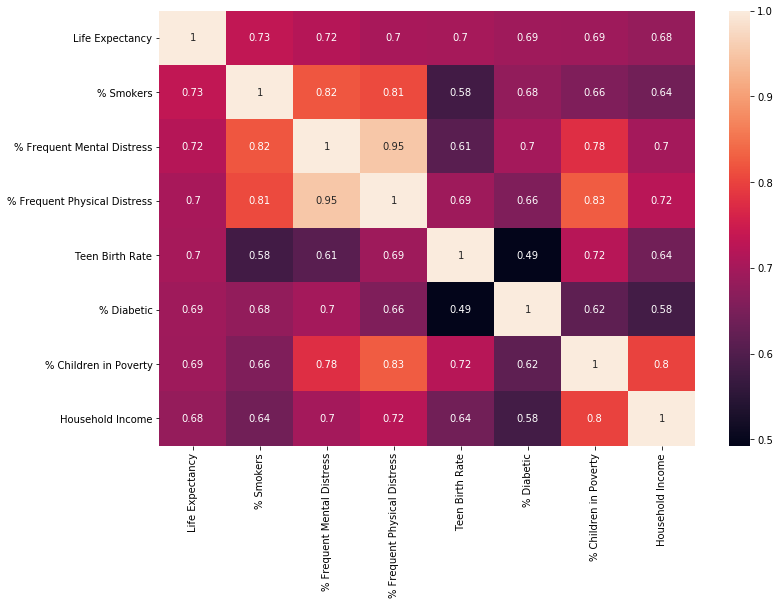

In [119]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_seven.corr().abs(), annot=True)

There is a high chance of multicollinearity between two independent variables % Smokers, %Frequent Mental Distress and % Frequent Physical Distress and % Children in Poverty and Household Income as we see from the heatmap above they are highly related to each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29640240>,
      dtype=object)

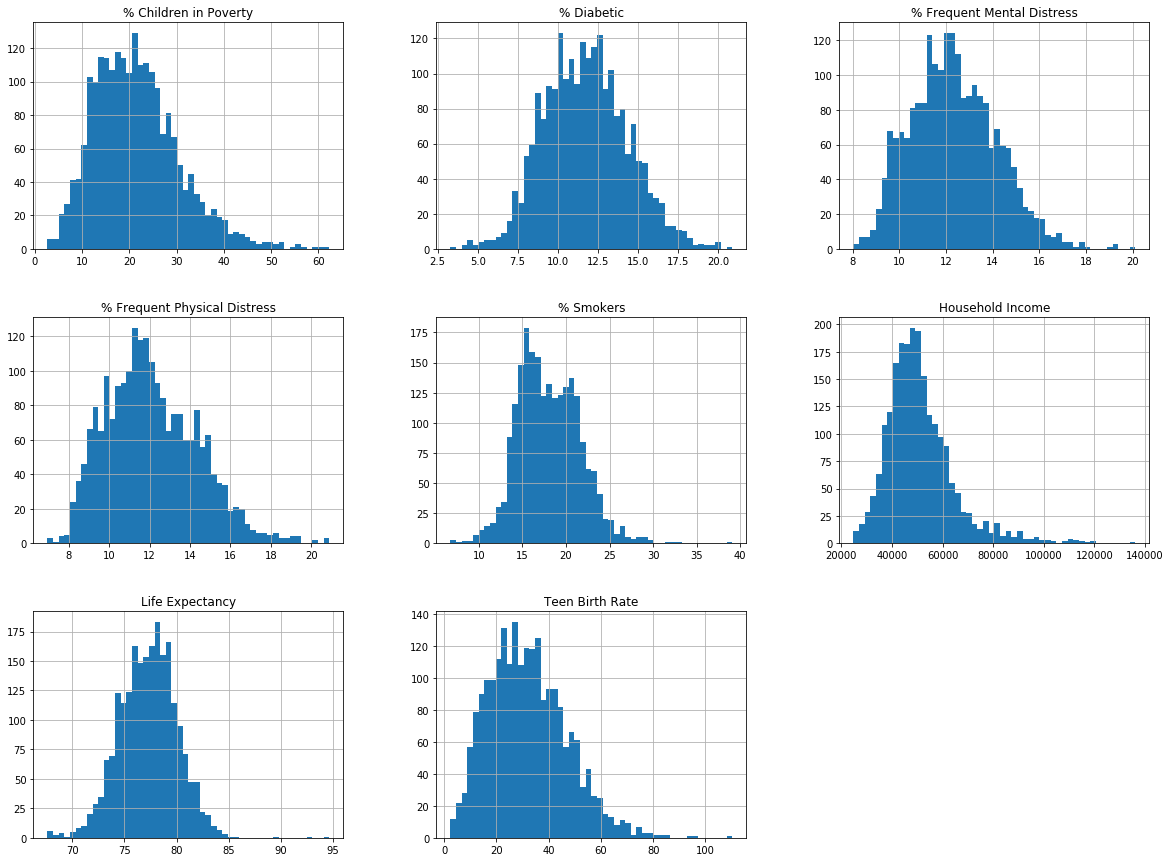

In [120]:
df_seven.hist(bins=50, figsize=(20,15))

Life Expectancy is not normal 1.9494763460838107e-13
% Smokers is not normal 2.5091547227491995e-19
% Frequent Mental Distress is not normal 3.298412540366009e-11
% Frequent Physical Distress is not normal 1.700472282832283e-20
Teen Birth Rate is not normal 7.042476531675867e-30
% Diabetic is not normal 0.0024223405498960135
% Children in Poverty is not normal 6.96569153278329e-47
Household Income is not normal 3.3947634100308313e-146


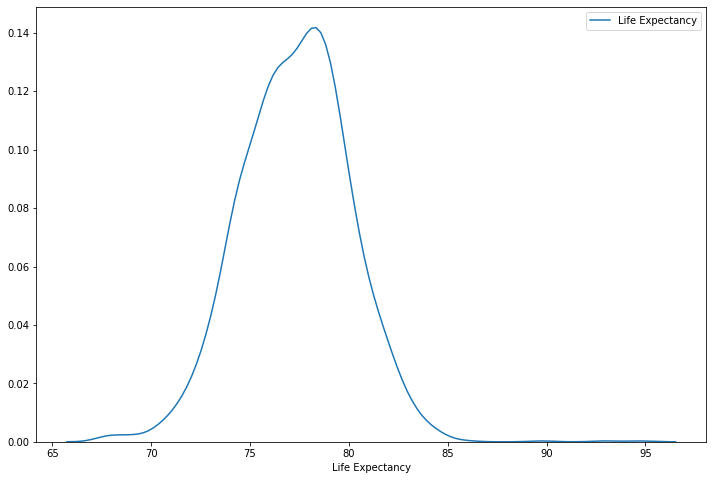

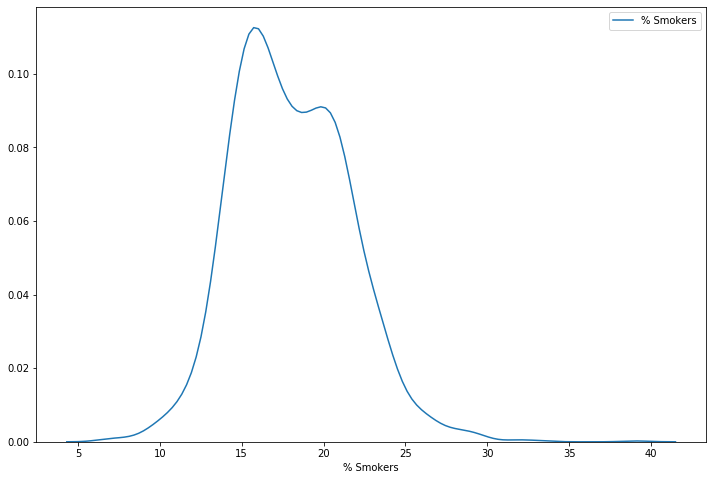

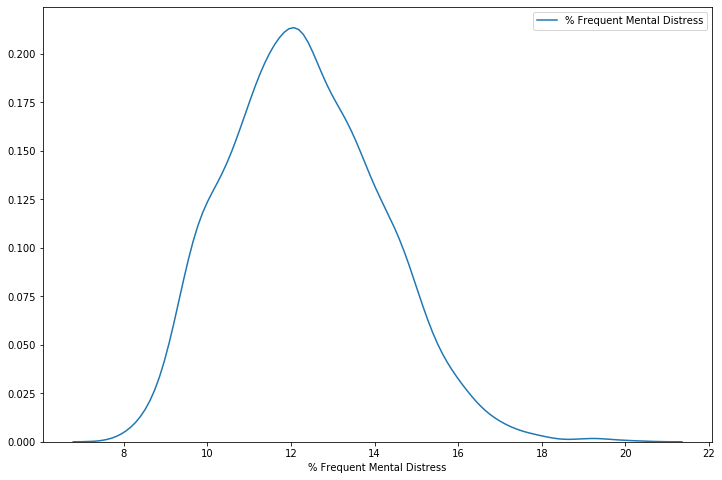

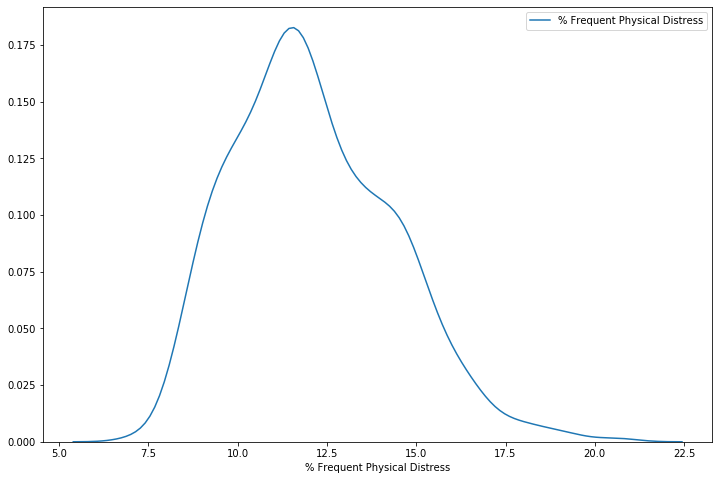

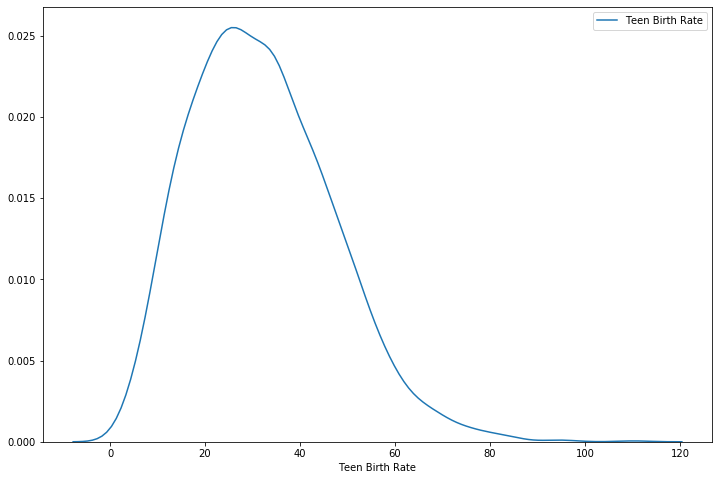

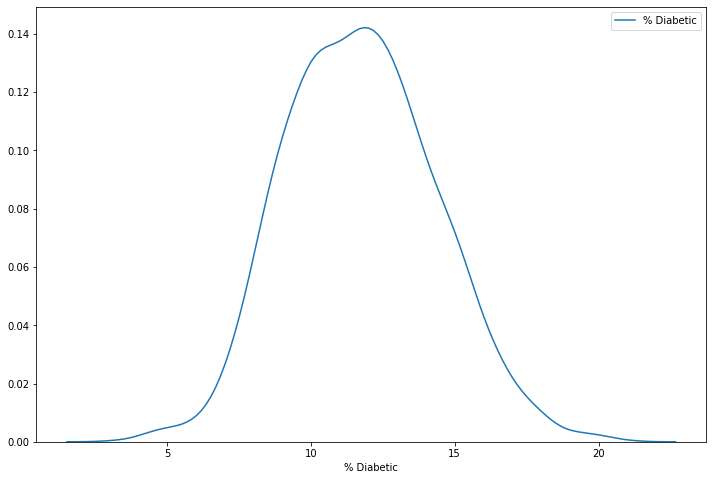

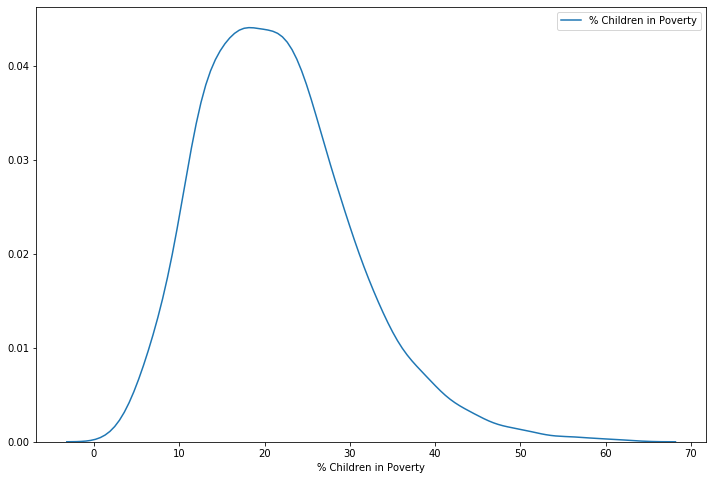

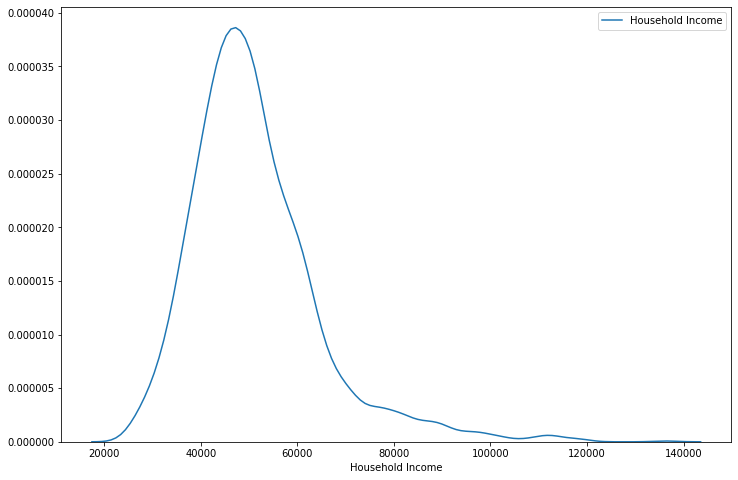

In [121]:
#Normality test
alpha = 0.05
for i in df_seven.columns:
    fig = plt.figure(figsize=(12,8))
    sns.distplot(df_seven[i], label=i, hist=False)
    k2, p = stats.normaltest(df_seven[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("%s is not normal"%i,p)
    else:
         print("%s is normal"%i)

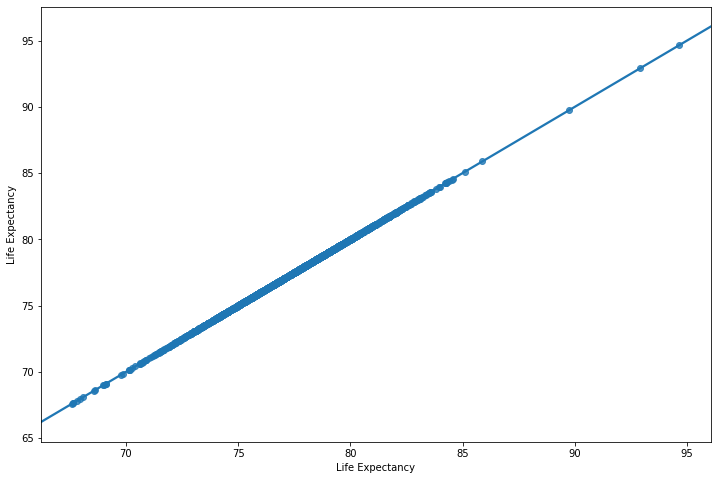

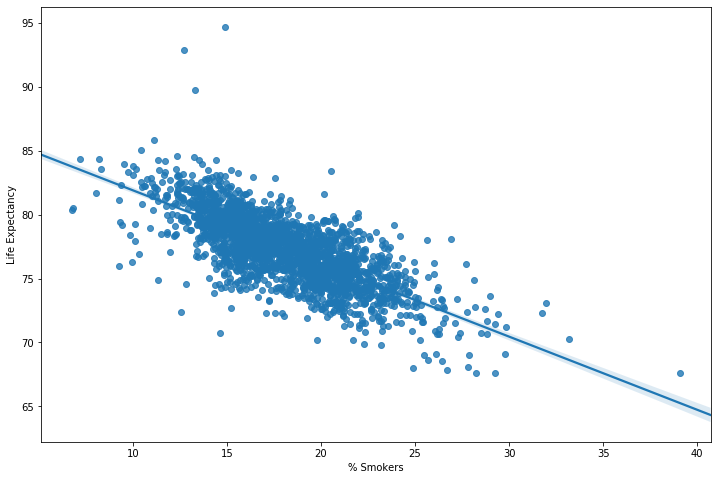

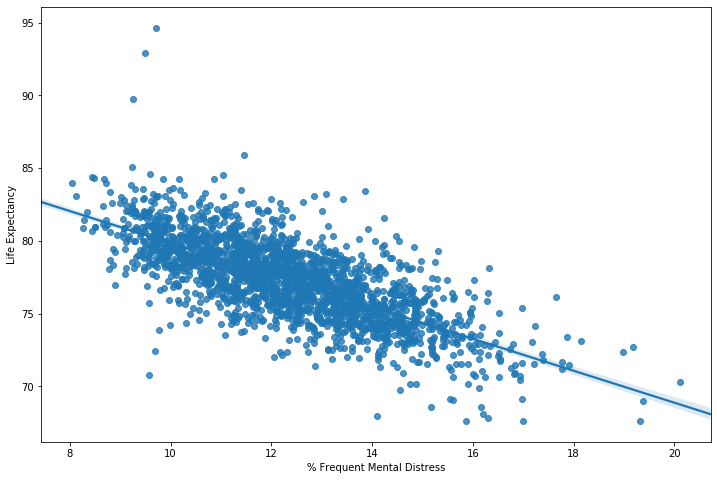

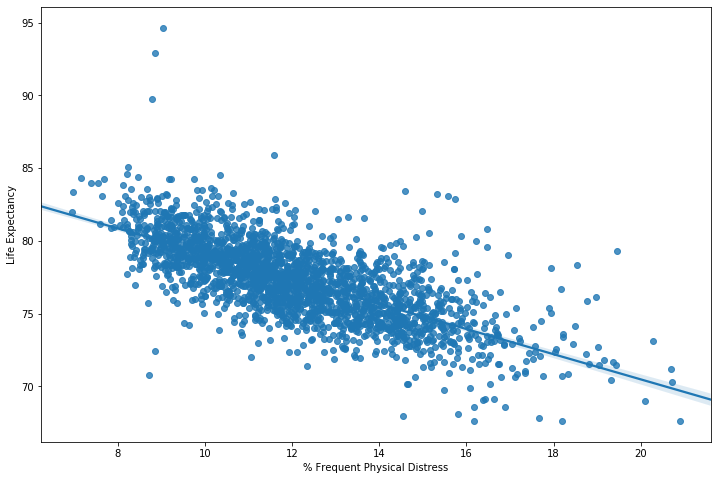

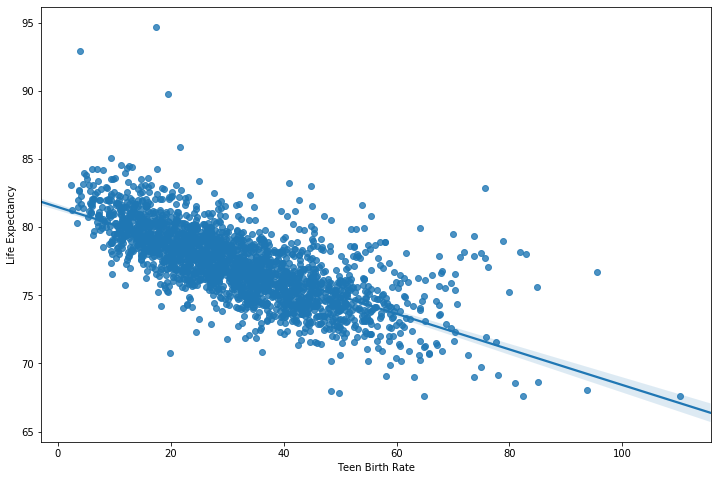

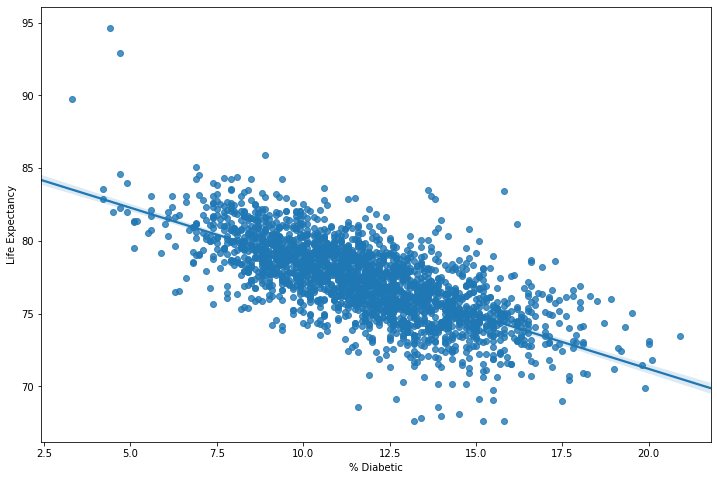

In [32]:
for i in df_five.columns:
    fig = plt.figure(figsize=(12,8))
    sns.regplot( x=df_five[i], y=df_five['Life Expectancy'])

Data doesn't look normal but for Linear Regression we don't need to normalize it since we will use Standard Scale.

In [124]:
target = train_set['Life Expectancy']
predictors1 = train_set[['% Smokers', 'Teen Birth Rate', '% Diabetic','% Children in Poverty' ]]

Transformation

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled1 = scaler.fit_transform(predictors1)

In [126]:
df_scaled = pd.DataFrame(scaled1)
df_scaled.columns = predictors1.columns

We will run different regression models to see which one performs best for our task and choose a baseline model among them

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [143]:
lin_reg = LinearRegression()
c_val = KFold(n_splits=5, shuffle=True, random_state=42)
lin_reg.fit(scaled1, target)
scores = cross_val_score(lin_reg, scaled1, target, scoring='neg_mean_squared_error', cv=c_val)
lin_score_r2 = np.mean(cross_val_score(lin_reg, scaled1, target, scoring='r2', cv=c_val))
lin_scores_rmse = np.sqrt(-scores)

In [144]:
def display_scores(scores, r2):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ',scores.std())
    print('r2: ', r2)

In [145]:
display_scores(lin_scores_rmse,lin_score_r2)

Scores:  [1.44005162 1.505103   1.50132353 1.46810114 1.66675614]
Mean:  1.51626708319117
Standard Deviation:  0.0788969675164464
r2:  0.6995847930089021


This is our baseline model. We will try to improve the model by adding more attributes. We will use only the attributes which has more than 0.4 correlation with Life Expectancy to keep our model as simple as possible. Before that we will check training data to make sure if there is any multicollinearity between independent variable.

In [141]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1) #Lasso is also known as the L1 norm. 
lasso.fit(scaled1, target)
scores_lasso = cross_val_score(lasso, scaled1, target, scoring='neg_mean_squared_error', cv=c_val)
lasso_r2 = np.mean(cross_val_score(lasso, scaled1, target, scoring='r2', cv=c_val))
lasso_rmse = np.sqrt(-scores_lasso)
display_scores(lasso_rmse, lasso_r2)

Scores:  [1.84255593 1.90712108 1.90187452 1.88663827 2.09230211]
Mean:  1.9260983811099401
Standard Deviation:  0.08614761070148848
r2:  0.5152646992204994


In [150]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()


In [151]:
tree_reg.fit(scaled1, target)
scores_tree = cross_val_score(tree_reg, scaled1, target, scoring='neg_mean_squared_error', cv=10)
tree_score_r2 = np.mean(cross_val_score(tree_reg, scaled1, target, scoring='r2', cv=c_val))
tree_rmse_scores = np.sqrt(-scores_tree)
display_scores(tree_rmse_scores, tree_score_r2)

Scores:  [2.05876798 2.00037453 2.03179046 2.05855625 2.37073434 1.96467824
 2.49800653 2.11193185 2.01454403 2.2250212 ]
Mean:  2.1334405406673054
Standard Deviation:  0.16730403206790115
r2:  0.32598204761340976


In [152]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()


In [153]:
forest_reg.fit(scaled1, target)
scores_forest = cross_val_score(forest_reg, scaled1, target, scoring='neg_mean_squared_error', cv=10)
forest_score_r2 = np.mean(cross_val_score(forest_reg, scaled1, target, scoring='r2', cv=c_val))
forest_rmse_scores = np.sqrt(-scores_forest)
display_scores(forest_rmse_scores, forest_score_r2)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [1.65946593 1.5852125  1.51765502 1.55881975 1.74477684 1.4720957
 1.86949137 1.55126768 1.49257713 1.60798553]
Mean:  1.6059347441414993
Standard Deviation:  0.11653449509817944
r2:  0.6479067233476149


Our baseline model will be the Linear Regression model.  We will try to improve the model by adding more attributes. We will use only the attributes which has more than 0.4 correlation with Life Expectancy to keep our model as simple as possible. Before that we will check training data to make sure if there is any multicollinearity between independent variable.

In [158]:
attributes = pd.DataFrame(train_set.corrwith(num['Life Expectancy']).abs() > 0.4)
attributes.reset_index(inplace=True)
attributes.columns = ['Attribute','Correlation']
list_attr = attributes.loc[attributes['Correlation'] == True, 'Attribute']
list_attr

0                  Life Expectancy
1     % Frequent Physical Distress
2       % Frequent Mental Distress
3                       % Diabetic
4                  % Food Insecure
5             % Insufficient Sleep
6                 Household Income
10                     % Fair/Poor
11                           % LBW
12                       % Smokers
13                         % Obese
14          Food Environment Index
15           % Physically Inactive
16                   % With Access
17            % Excessive Drinking
20                 Teen Birth Rate
23          Preventable Hosp. Rate
24                      % Screened
27                  % Some College
28                    % Unemployed
29           % Children in Poverty
31      % Single-Parent Households
33               Injury Death Rate
Name: Attribute, dtype: object

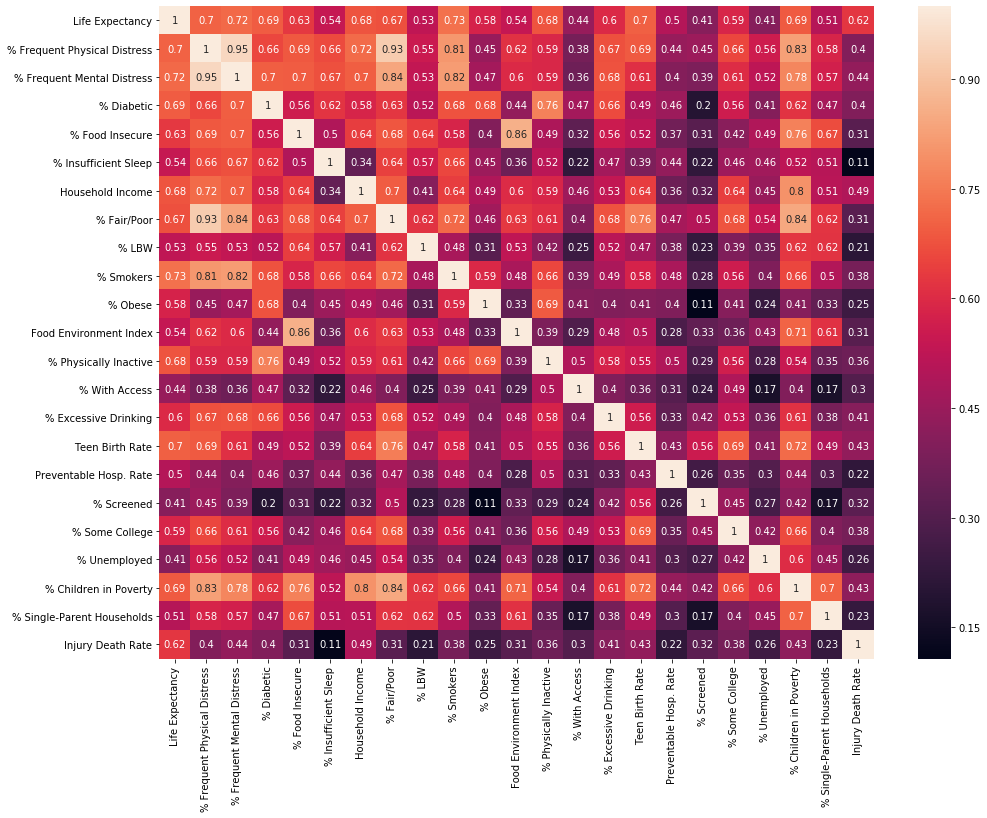

In [159]:
df_att = train_set[list(list_attr)]
fig = plt.figure(figsize=(16,12))
sns.heatmap(df_att.corr().abs(), annot=True)

In [160]:
corr = df_att.corr() < 0.75
corr.reset_index(drop=False,inplace=True)
corr.rename(columns={'index': 'Attribute'},inplace=True)
corr.head()

,Attribute,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,% Food Insecure,% Insufficient Sleep,Household Income,% Fair/Poor,% LBW,...,% With Access,% Excessive Drinking,Teen Birth Rate,Preventable Hosp. Rate,% Screened,% Some College,% Unemployed,% Children in Poverty,% Single-Parent Households,Injury Death Rate
0,Life Expectancy,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,% Frequent Physical Distress,True,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,True,True
2,% Frequent Mental Distress,True,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,False,True,True
3,% Diabetic,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,% Food Insecure,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True


In [161]:
for i in corr.columns:
    for j in list(range(1,len(corr))):
        if corr[i][j] == False:
            if i != corr.Attribute[j]:
                print(f'High chance of multicollinearity between:\n {i} and {corr.Attribute[j]}\n')
            else:
                pass
        else:
            pass

High chance of multicollinearity between:
 % Frequent Physical Distress and % Frequent Mental Distress

High chance of multicollinearity between:
 % Frequent Physical Distress and % Fair/Poor

High chance of multicollinearity between:
 % Frequent Physical Distress and % Smokers

High chance of multicollinearity between:
 % Frequent Physical Distress and % Children in Poverty

High chance of multicollinearity between:
 % Frequent Mental Distress and % Frequent Physical Distress

High chance of multicollinearity between:
 % Frequent Mental Distress and % Fair/Poor

High chance of multicollinearity between:
 % Frequent Mental Distress and % Smokers

High chance of multicollinearity between:
 % Frequent Mental Distress and % Children in Poverty

High chance of multicollinearity between:
 % Diabetic and % Physically Inactive

High chance of multicollinearity between:
 % Food Insecure and % Children in Poverty

High chance of multicollinearity between:
 % Fair/Poor and % Frequent Physical Di

The variables we should exclude from our model are:
% Frequent Physical Distress 
% Frequent Mental Distress
% Physically Inactive
% Children in Poverty
% Fair/Poor

In [169]:
multicollinear = ['% Frequent Physical Distress', '% Frequent Mental Distress','% Physically Inactive',
'% Children in Poverty','% Fair/Poor']

In [172]:
predict_variables = train_set.drop(multicollinear, axis=1)
predict_variables.drop('Life Expectancy', axis=1, inplace=True)

In [173]:
predict_variables.columns

Index(['% Diabetic', '% Food Insecure', '% Insufficient Sleep',
       'Household Income', '% Homeowners', '% Severe Housing Cost Burden',
       'Population', '% LBW', '% Smokers', '% Obese', 'Food Environment Index',
       '% With Access', '% Excessive Drinking', '% Alcohol-Impaired',
       'Chlamydia Rate', 'Teen Birth Rate', '% Uninsured', 'Dentist Rate',
       'Preventable Hosp. Rate', '% Screened', '% Vaccinated',
       'Graduation Rate', '% Some College', '% Unemployed', 'Income Ratio',
       '% Single-Parent Households', 'Association Rate', 'Injury Death Rate',
       'Average Daily PM2.5', '% Severe Housing Problems', '% Drive Alone',
       '% Long Commute - Drives Alone'],
      dtype='object')